<a href="https://colab.research.google.com/github/angelafrocha/WomakersCode/blob/main/Chalenge_Frenqu%C3%AAncias_e_Medidas_Equipe_Jaqueline_Goes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Equipe Jaqueline Goes: Chalenge Frenquências e Medidas - Bootcamp Data Analytics


## Integrantes
- Ana Claudia Caloi
- Ângela Fernandes Rocha
- Bruna Bernardo Pivotto
- Deise Somaya Gomes da Silva
- Juliana Alves Oliveira Pereira
- Marlana Portilho Rodrigues Santos
- Talita de Lana Nacimento
- Tatiane Pereira

## Como nos organizamos

Nós marcamos um encontro inicial para discutir as questões do desafio, a forma como iríamos responder e entender o que cada questão queria. Paralelamente, enquanto discutíamos cada questão nós já aproveitamos para resolver e escolher o melhor código em comum acordo com TODAS do grupo.

Feito isso, nós nos revezamos para acrescentar os comentários pertinentes, explicar o uso de alguns métodos e fazer as atividades extras, sendo que todas tieram a oportunidade de contribuir igualmente em cada etapa da resolução desse desafio.

## Nossas Dificuldades

Encontrar um dia e horário no qual todas estivesse disponíveis para fazer a reunião

## Nossas facilidades

O grupo inteiro teve muito interesse em ajudar a resolver os problemas e acrescentar novas soluções ao desafio. Também todas contribuíram com os comentários e com as análises das informações encontradas

In [258]:
# Importação das bibliotecas que serão utilizadas na análise
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

###1.Leitura da base de dados e análise inicial

In [220]:
# Pegando o arguivo csv e colocando dentro de uma variável
df = pd.read_csv("/content/StudentsPerformance.csv")

In [221]:
  # Verificando a quantidade de linhas e colunas
  df.shape

(1000, 8)

In [222]:
# Verificando a existência de valores nulos
df.isnull().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

OBS: o método "isnull( )" retorna **True** para a existência de valores nulos e o método e False quando não existe valor nulo, ou seja, substitui os dados por True ou False. Já o método "any( )" verifica cada coluna.

**O DATASET ANALISADO NÃO APRESENTA DADOS NULOS**

In [223]:
# Verificando o DataFrame por completo
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


#### Tipo dos dados de cada coluna (Visão estatística)

Raça/ Etinia = Qualitativa Nominal

Grau de Escolariade dos pais = Qualitativa Ordinal

Tipo de almoço = Qualitativa Nominal

Curso Preparatório = Qualitativo Nominal

Nota de Matemática = Quantitativa Discreta

Nota de Leitura = Quantitativa Discreta

Nota de Escrita = Quantitativa Discreta

In [224]:
# Verificando os tipos (em python) dos dados de cada coluna
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

Os dados relacionados a notas são Inteiros e as damais colunas possuem dados em String

##### **Analisando cada coluna**

Optamos pro verificar os dados únicos das colunas com dados qualitativos utilizando o método "unique( )" do pandas para ver apenas os valores único e combinamos com a função "sorted( )" para vermos esees dados organizados de forma crescente( no caso dos dados qualitativos - em ordem alfabética)

In [225]:
sorted(df['gender'].unique())

['female', 'male']

In [226]:
sorted(df['race/ethnicity'].unique())

['group A', 'group B', 'group C', 'group D', 'group E']

In [227]:
sorted(df['parental level of education'].unique())

["associate's degree",
 "bachelor's degree",
 'high school',
 "master's degree",
 'some college',
 'some high school']

In [228]:
sorted(df['lunch'].unique())

['free/reduced', 'standard']

In [229]:
sorted(df['test preparation course'].unique())

['completed', 'none']

**Para as variáveis quantitativas discretas optamos por mostrar o range de cada coluna.**

Escolhemos usar o recurso de formatação f-string onde incluímos já dentro do print os comandos para calcular o valor mínimo e o máximo.

In [230]:
print(f"As notas de matemática vão de {df['math score'].min()} até {df['math score'].max()}")

As notas de matemática vão de 0 até 100


In [231]:
print(f"As notas de leitura vão de {df['reading score'].min()} até {df['reading score'].max()}")

As notas de leitura vão de 17 até 100


In [232]:
print(f"As notas de escrita vão de {df['writing score'].min()} até {df['writing score'].max()}")

As notas de escrita vão de 10 até 100


### 2. Alteração das variáveis

Para facilitar o entendimento dos dados nós resolvemos fazer a tradução das colunas e dos dados contidos nelas.

OBS: O dicionário dos dados foi encontrado em ...


**Para renomear as colunasm utilizamos o método "rename"**

In [233]:
df = df.rename(columns={'gender': 'genero',
                        'race/ethnicity': 'raca/etnia',
                        'parental level of education': 'escolaridade_dos_pais',
                        'lunch': 'tipo_de_almoco',
                        'test preparation course': 'curso_preparatorio',
                        'math score': 'nota_matematica',
                        'reading score': 'nota_leitura',
                        'writing score': 'nota_escrita'})

**Para renomear os dados das colunas utilizamos o método replace para subsituir valores**

In [234]:
# Traduzindo os dados da coluna "genero"
df['genero'] = df['genero'].replace({'female': 'feminino',
                                     'male': 'masculino'})

In [235]:
# Traduzindo o s dados da coluna "raca/etnia"
df['raca/etnia'] = df['raca/etnia'].replace({'group A': 'Branco_Britanico',
                                                     'group B': 'Branco_Irlandes',
                                                     'group C': 'Branco_outros',
                                                     'group D': 'M_B_Caribenho',
                                                     'group E': 'M_B_Negro_Afr',
                                                     'group F': 'M_B_Asiático',
                                                     'group G': 'M_Outros'})

In [236]:
# Traduzindo os dados da coluna "escolaridade_dos pais"
df['escolaridade_dos_pais'] = df['escolaridade_dos_pais'].replace({'some high school': 'nao_concluiu_EM',
                                                                   'high school': 'EM_completo',
                                                                   'some college': 'superior_incompleto',
                                                                   "associate's degree": "tecnólogo",
                                                                   "bachelor's degree": "bacharelado",
                                                                   "master's degree": 'mestrado'})

In [237]:
# Traduzindo a coluna "tipo_de_almoço"
df['tipo_de_almoco'] = df['tipo_de_almoco'].replace({'standard':'padrao',
                                                     'free/reduced':'reduzido'})

In [238]:
# Traduzindo os dados da coluna "curso_preparatorio"
df['curso_preparatorio']=df['curso_preparatorio'].replace({'none':'nenhum',
                                                           'completed':'completo'})

In [239]:
# Observando se as mudanças foram efetuadas corretamente
df

,genero,raca/etnia,escolaridade_dos_pais,tipo_de_almoco,curso_preparatorio,nota_matematica,nota_leitura,nota_escrita
0,feminino,Branco_Irlandes,bacharelado,padrao,nenhum,72,72,74
1,feminino,Branco_outros,superior_incompleto,padrao,completo,69,90,88
2,feminino,Branco_Irlandes,mestrado,padrao,nenhum,90,95,93
3,masculino,Branco_Britanico,tecnólogo,reduzido,nenhum,47,57,44
4,masculino,Branco_outros,superior_incompleto,padrao,nenhum,76,78,75
...,...,...,...,...,...,...,...,...
995,feminino,M_B_Negro_Afr,mestrado,padrao,completo,88,99,95
996,masculino,Branco_outros,EM_completo,reduzido,nenhum,62,55,55
997,feminino,Branco_outros,EM_completo,reduzido,completo,59,71,65
998,feminino,M_B_Caribenho,superior_incompleto,padrao,completo,68,78,77


### 3.Determinação da quantidade de alunos em cada grupo racial/étnico

Utilizamos o método 'value_counts()' para fazer a contagem dos dados dentro da coluna

In [240]:
df['raca/etnia'].value_counts()

Branco_outros       319
M_B_Caribenho       262
Branco_Irlandes     190
M_B_Negro_Afr       140
Branco_Britanico     89
Name: raca/etnia, dtype: int64

Utilizamos o parâmetro "normalize" porque ele calcular a proporção

In [241]:
df['raca/etnia'].value_counts(normalize=True)

Branco_outros       0.319
M_B_Caribenho       0.262
Branco_Irlandes     0.190
M_B_Negro_Afr       0.140
Branco_Britanico    0.089
Name: raca/etnia, dtype: float64

In [242]:
# Fazendo a tabela de distribuição de frequência
frequencia_raca = df['raca/etnia'].value_counts()
percentual_raca = df['raca/etnia'].value_counts(normalize=True) *100
dist_freq_raca = pd.DataFrame({'Frequência': frequencia_raca, 'Porcentagem (%)': percentual_raca})
dist_freq_raca.rename_axis('Raça/Etnia', axis= 'columns', inplace = True)

No código acima foram designadas variáveis para a frequencia absoluta e relativa(percentual), nas quais colocamos os códigos anteriores, depois criamos um novo DataFrame para receber esses dados e ao final renomeamos o título da coluna que contém os dados únicos respectivos.

In [243]:
#Mostrando a tabela de frequêcia de alunos por raça/etnia
dist_freq_raca

Raça/Etnia,Frequência,Porcentagem (%)
Branco_outros,319,31.9
M_B_Caribenho,262,26.2
Branco_Irlandes,190,19.0
M_B_Negro_Afr,140,14.0
Branco_Britanico,89,8.9


### 4.Determinação da quantidade de alunos de cada gênero

Aqui nós optamos por usar o mesmo método que foi utilizado no exercício anterior

In [244]:
df['genero'].value_counts().sort_index()

feminino     518
masculino    482
Name: genero, dtype: int64

In [245]:
df['genero'].value_counts(normalize=True)

feminino     0.518
masculino    0.482
Name: genero, dtype: float64

In [246]:
# Fazendo a tabela de distribuição de frequência
frequencia_genero = df['genero'].value_counts()
percentual_genero = df['genero'].value_counts(normalize=True) *100
dist_freq_genero = pd.DataFrame({'Frequência': frequencia_genero, 'Porcentagem (%)': percentual_genero})
dist_freq_genero.rename_axis('Gênero', axis= 'columns', inplace = True)

In [247]:
# Mostrando a tabela de frequência da quantidade de alunos por gênero
dist_freq_gender

Gênero,Frequência,Porcentagem (%)
female,518,51.8
male,482,48.2


Observa-se na tabela de frequência que no grupo em questão existem mais homens que mulheres sendo que elas representam 51,8% do total de alunos com 518 integrantes.

###**5.**
a)Analisar a nota de matemática dos alunos de forma mais completa possível.

Qual a nota média de matemática dos alunos segundo o grau de
escolaridade dos pais?

b)Fazer também para leitura

c)Fazer também para escrita

d)Verificar gráficamente a relação da nota de leitura e de escrita

#### a) Análise da nota de Matemática

In [248]:
df['nota_matematica'].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: nota_matematica, dtype: float64

Acima tem os valores da média e mediana(50%) que são bem parecidas indicando que se trata provavelmente de uma curva sem calda. Também é possivel observar os delimitadores dos quartis e os valores máximos e mínimos e o desvio padrão

In [249]:
# Descobrindo a moda(nota que mais se repete)
df['nota_matematica'].mode()

0    65
Name: nota_matematica, dtype: int64

Text(0, 0.5, 'Frequência')

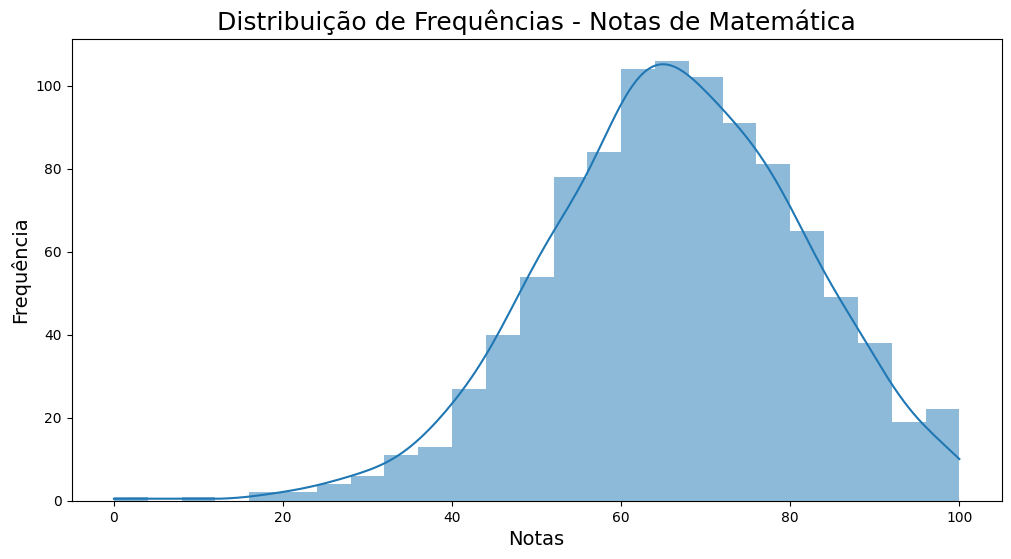

In [262]:
# Verificando a distribuição de frequência das notas de matemática
fig, ax = sns.histplot(df['nota_matematica'], kde=True, edgecolor=None).figure, plt.gca()
fig.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Notas de Matemática', fontsize=18)
ax.set_xlabel('Notas', fontsize=14)
ax.set_ylabel('Frequência', fontsize=14)

In [251]:
#Calculando a nota média de matemática dos alunos segundo o grau de escolaridade dos pais
df.groupby('escolaridade_dos_pais')['nota_matematica'].mean().sort_values(ascending=False)

escolaridade_dos_pais
mestrado               69.745763
bacharelado            69.389831
tecnólogo              67.882883
superior_incompleto    67.128319
nao_concluiu_EM        63.497207
EM_completo            62.137755
Name: nota_matematica, dtype: float64

Nota-se que quanto maior o grau de escolaridade dos pais, maior a nota média de matemática. Com exceção apenas para o fato de que filhos que possuem pais que não concluiram o ensino médio possuem uma média maior que de pais que completaram o ensino médio.

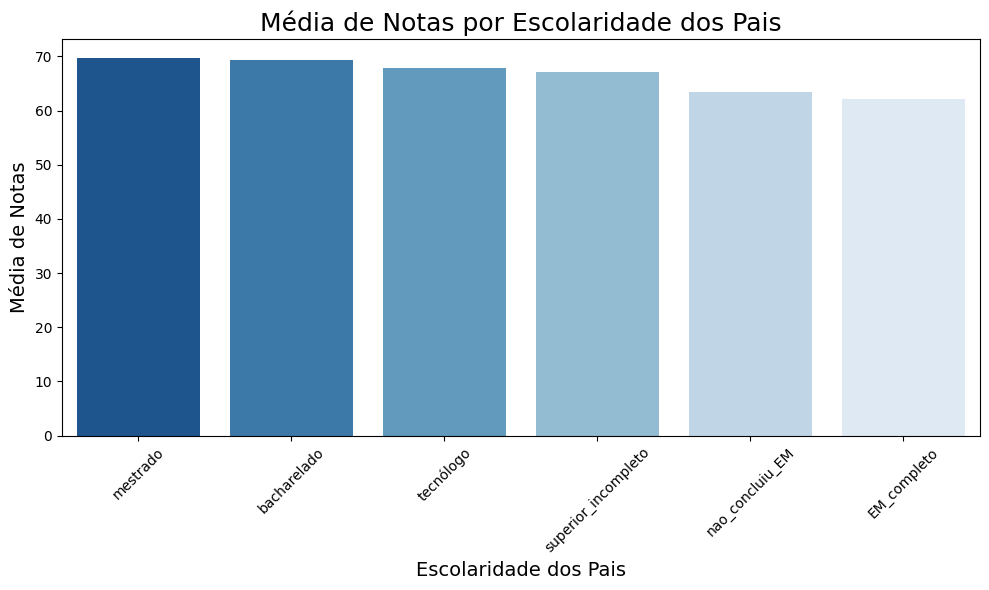

In [267]:
# Gráfico de barras pra visualizar a análise acima
media_mat_pais = df.groupby('escolaridade_dos_pais')['nota_matematica'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=media_mat_pais.index, y=media_mat_pais.values, palette="Blues_r")
plt.title('Média de matemática pela Escolaridade dos Pais', fontsize=18)
plt.xlabel('Escolaridade dos Pais', fontsize=14)
plt.ylabel('Média de Notas', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### b) Análise da nota de Leitura

In [252]:
df['nota_leitura'].describe()

count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: nota_leitura, dtype: float64

In [256]:
# Descobrindo a moda(nota que mais se repete)
df['nota_leitura'].mode()

0    72
Name: nota_leitura, dtype: int64

Text(0, 0.5, 'Frequência')

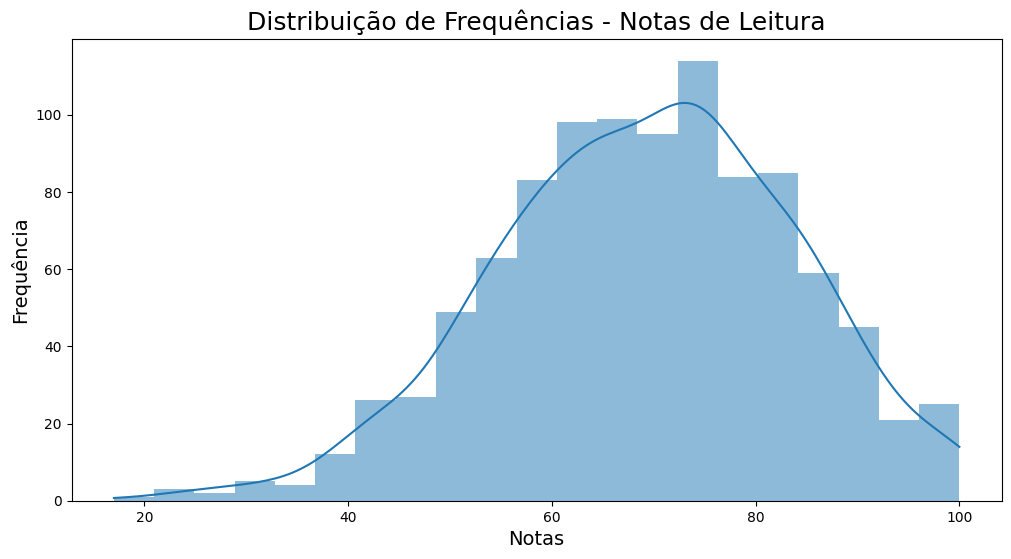

In [261]:
# Verificando a distribuição de frequência das notas de leitura
fig, ax = sns.histplot(df['nota_leitura'], kde=True, edgecolor=None).figure, plt.gca()
fig.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Notas de Leitura', fontsize=18)
ax.set_xlabel('Notas', fontsize=14)
ax.set_ylabel('Frequência', fontsize=14)

In [257]:
#Verificando a nota média de leitura dos alunos segundo o grau de escolaridade dos pais
df.groupby('escolaridade_dos_pais')['nota_leitura'].mean().sort_values(ascending=False)

escolaridade_dos_pais
mestrado               75.372881
bacharelado            73.000000
tecnólogo              70.927928
superior_incompleto    69.460177
nao_concluiu_EM        66.938547
EM_completo            64.704082
Name: nota_leitura, dtype: float64

Nota-se que quanto maior o grau de escolaridade dos pais, maior a nota média de leitura. Com exceção apenas para o fato de que filhos que possuem pais que não concluiram o ensino médio possuem uma média maior que de pais que completaram o ensino médio.

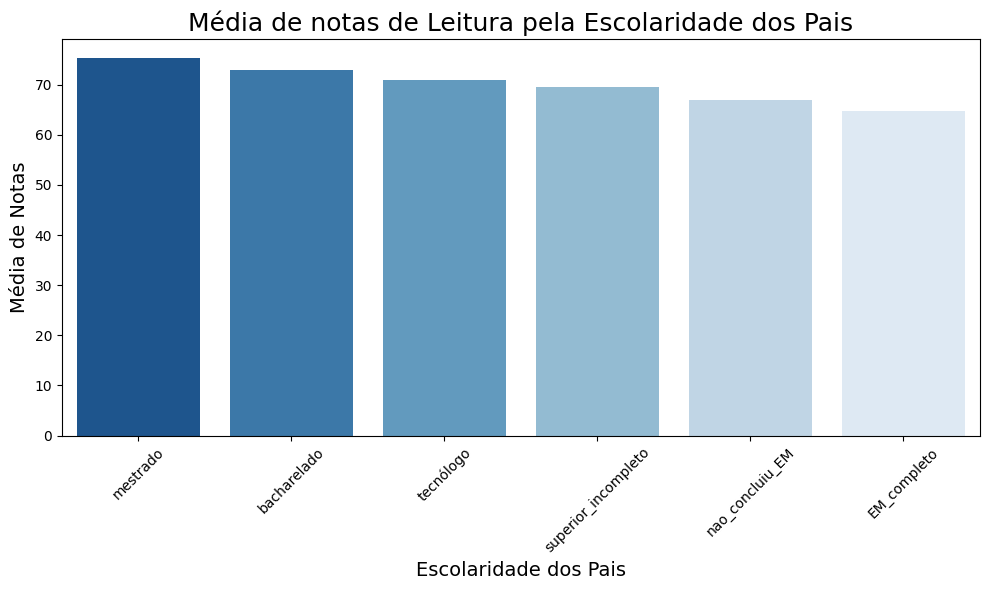

In [268]:
# Gráfico de barras pra visualizar a análise acima
media_leit_pais = df.groupby('escolaridade_dos_pais')['nota_leitura'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=media_leit_pais.index, y=media_leit_pais.values, palette="Blues_r")
plt.title('Média de notas de Leitura pela Escolaridade dos Pais', fontsize=18)
plt.xlabel('Escolaridade dos Pais', fontsize=14)
plt.ylabel('Média de Notas', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### c) Análise da nota de Escrita

In [269]:
df['nota_escrita'].describe()

count    1000.000000
mean       68.054000
std        15.195657
min        10.000000
25%        57.750000
50%        69.000000
75%        79.000000
max       100.000000
Name: nota_escrita, dtype: float64

In [270]:
# Descobrindo a moda(nota que mais se repete)
df['nota_escrita'].mode()

0    74
Name: nota_escrita, dtype: int64

Text(0, 0.5, 'Frequência')

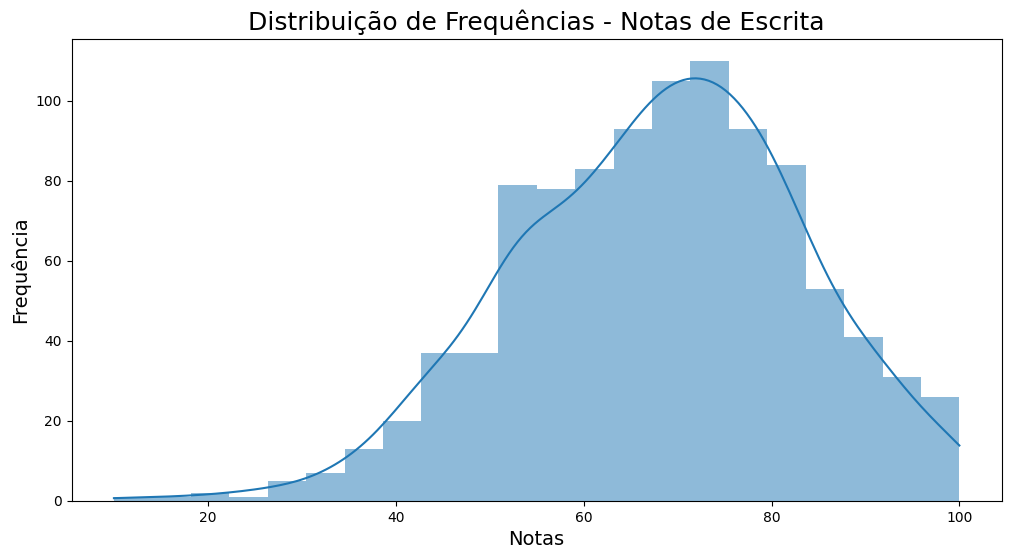

In [273]:
# Verificando a distribuição de frequência das notas de escrita
fig, ax = sns.histplot(df['nota_escrita'], kde=True, edgecolor=None).figure, plt.gca()
fig.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Notas de Escrita', fontsize=18)
ax.set_xlabel('Notas', fontsize=14)
ax.set_ylabel('Frequência', fontsize=14)

In [271]:
#Verificando a nota média de escrita dos alunos segundo o grau de escolaridade dos pais`
df.groupby('escolaridade_dos_pais')['nota_leitura'].mean().sort_values(ascending=False)

escolaridade_dos_pais
mestrado               75.372881
bacharelado            73.000000
tecnólogo              70.927928
superior_incompleto    69.460177
nao_concluiu_EM        66.938547
EM_completo            64.704082
Name: nota_leitura, dtype: float64

Nota-se que quanto maior o grau de escolaridade dos pais, maior a nota média de escrita. Com exceção apenas para o fato de que filhos que possuem pais que não concluiram o ensino médio possuem uma média maior que de pais que completaram o ensino médio.

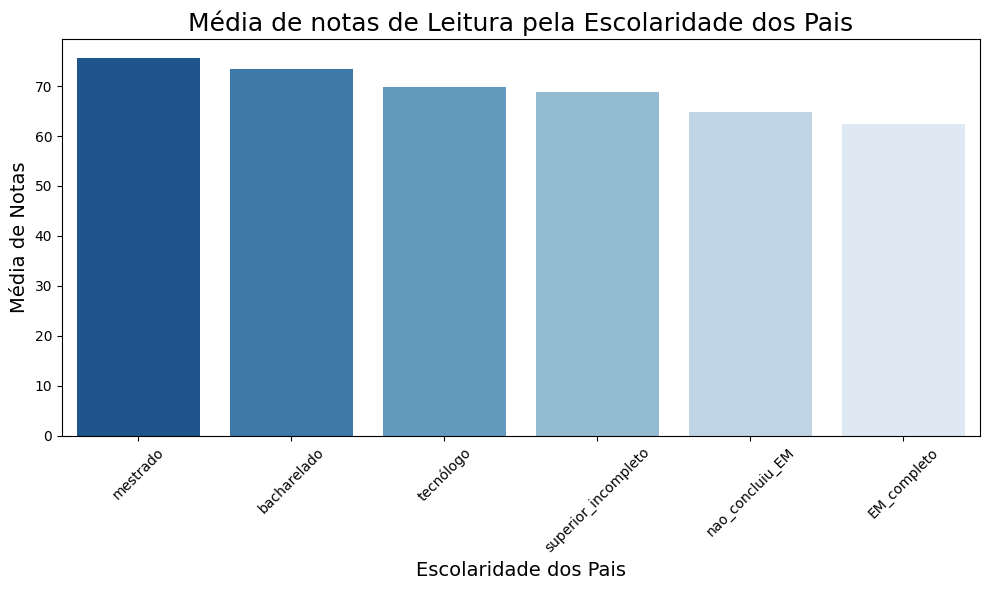

In [274]:
# Gráfico de barras pra visualizar a análise acima
media_escr_pais = df.groupby('escolaridade_dos_pais')['nota_escrita'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=media_escr_pais.index, y=media_escr_pais.values, palette="Blues_r")
plt.title('Média de notas de Leitura pela Escolaridade dos Pais', fontsize=18)
plt.xlabel('Escolaridade dos Pais', fontsize=14)
plt.ylabel('Média de Notas', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### d) Gráfico da relação da nota de leitura e de escrita

<Axes: title={'center': 'Relação das Notas de Leitura e Escrita'}, xlabel='Nota'>

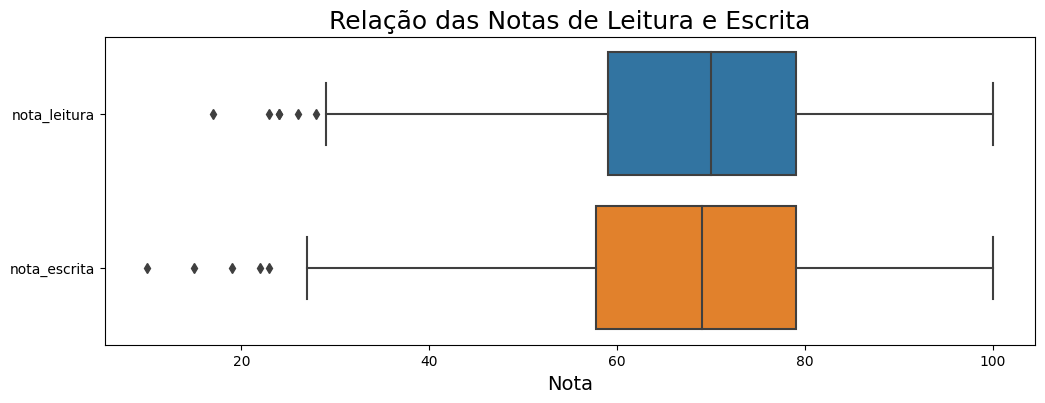

In [276]:
#Boxplot da relação das notas de leitura e escrita

ax = sns.boxplot(data=df[['nota_leitura', 'nota_escrita']], orient='h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Relação das Notas de Leitura e Escrita', fontsize=18)
ax.set_xlabel('Nota', fontsize=14)
ax

Nota-se que as notas de escrita possuem dados mais dispersos em relação as notas de leitura. Os valores da mediana e média são bem próximos e do terceiro quartil são iguais. Ambos apresentam mais valores extremos (outliers), no entanto nota-se que os outliers das notas de escrita se estendem para longe da mediana.
Ambos apresentam gráfico de relação entre média, mediana e moda com assimetria a esquerda.

# Extra - análise de dados e gráfica

In [278]:
## Qual é a nota média da nota de mulheres e homens em matemática?
df.groupby('genero')['nota_matematica'].mean().sort_values(ascending=True)

genero
feminino     63.633205
masculino    68.728216
Name: nota_matematica, dtype: float64

In [279]:
#Qual o valor do desvio padrão da variável nota de matemática de mulheres
std_F = df.groupby('genero')['nota_matematica'].std().loc['feminino']
std_F

15.491453242339517

In [281]:
#Qual o valor do desvio padrão da variável nota de matemática de homens
std_M = df.groupby('genero')['nota_matematica'].std().loc['masculino']
std_M

14.356277196362376

<Axes: title={'center': 'Matemática'}, xlabel='Nota', ylabel='genero'>

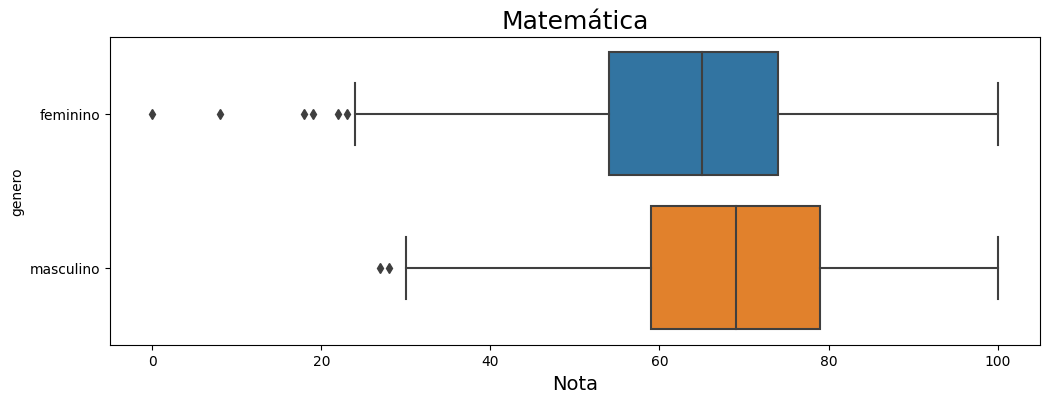

In [282]:
#Boxplot das notas de matemática por sexo. O gráfico mostra que as notas de matemática das mulheres possui mais assimetria em relação aos homens.

ax = sns.boxplot( x = 'nota_matematica', y = 'genero', data = df, orient = 'h')
ax.figure.set_size_inches(12, 4)
ax.set_title('Matemática', fontsize=18)
ax.set_xlabel('Nota', fontsize=14)
ax

Observa-se que as notas de matemática para o sexo feminino possuem mais valores extremos, em relação as notas do sexo masculino. As notas do sexo feminino possuem maior variabilidade em relação ao sexo masculino. A média e mediana das notas do sexo masculino é também superior ao feminino.

In [283]:
#Obtendo a média, mediana e valor máximo da variável Notas de Matemática segundo Etnia e Genêro
notas_estatisticas_por_genero_e_etnia = pd.crosstab(df['raca/etnia'],
                                                df['genero'],
                                                values = df['nota_matematica'],
                                                aggfunc = {'mean', 'median', 'max'})
notas_estatisticas_por_genero_e_etnia

max                 mean              median          
genero           feminino masculino   feminino  masculino feminino masculino
raca/etnia                                                                  
Branco_Britanico       92       100  58.527778  63.735849     57.0      63.0
Branco_Irlandes        97        94  61.403846  65.930233     62.0      65.0
Branco_outros          96        98  62.033333  67.611511     63.0      68.0
M_B_Caribenho          98       100  65.248062  69.413534     65.0      71.0
M_B_Negro_Afr         100       100  70.811594  76.746479     71.0      78.0

Nota-se que as mulheres possuem médias e medianas menores que os homens para todas as etnias. O mesmo comportamento ocorre para as notas máximas, com exceção da nota máxima de pessoas brancas (irlandes) e pessoas .

In [284]:
#Obtendo a média, mediana e valor máximo da variável Notas de Matemática segundo Etnia e Genêro
notas_estatisticas_por_grau_educacao = pd.crosstab(df['escolaridade_dos_pais'],
                                                df['genero'],
                                                values = df['nota_matematica'],
                                                aggfunc = {'mean', 'median', 'max'})
notas_estatisticas_por_grau_educacao

max                 mean              median  \
genero                feminino masculino   feminino  masculino feminino   
escolaridade_dos_pais                                                     
EM_completo                 99        94  59.351064  64.705882     61.0   
bacharelado                100       100  68.349206  70.581818     67.0   
mestrado                    94        95  66.500000  74.826087     64.5   
nao_concluiu_EM             97        94  59.296703  67.840909     63.0   
superior_incompleto        100       100  65.406780  69.009259     65.5   
tecnólogo                  100       100  65.250000  70.764151     65.0   

                                 
genero                masculino  
escolaridade_dos_pais            
EM_completo                66.0  
bacharelado                70.0  
mestrado                   79.0  
nao_concluiu_EM            68.0  
superior_incompleto        69.0  
tecnólogo                  72.0

Nota-se um compartamento parecido com o gráfico anterior, onte as mulheres possuem médias e medianas menores que os homens para todas as categorias de grau de educação dos pais. O mesmo comportamento ocorre para as notas máximas, com exceção da nota máxima de pais com ensino médio compleo e que não concluiram o ensino médio.

<Axes: title={'center': 'Box-plot da Notas de Matemática por Grau de Escolaridade dos Pais'}, xlabel='Notas de Matemática', ylabel='Grau de Escolaridade dos Pais'>

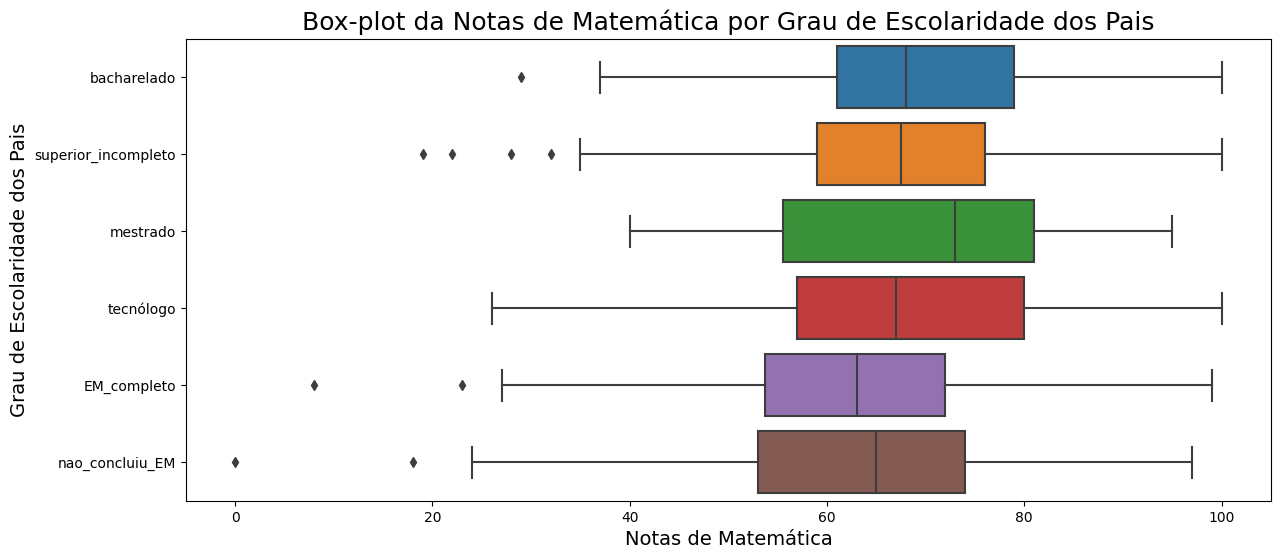

In [295]:
ax = sns.boxplot(x = 'nota_matematica', y = 'escolaridade_dos_pais', data=df, orient='h')
ax.figure.set_size_inches(14, 6)    # Personalizando o tamanho da figura

ax.set_title('Box-plot da Notas de Matemática por Grau de Escolaridade dos Pais', fontsize=18)    # Configurando o título do gráfico

ax.set_xlabel('Notas de Matemática', fontsize=14)    # Configurando o label do eixo X

ax.set_ylabel('Grau de Escolaridade dos Pais', fontsize=14)    # Configurando o label do eixo Y

ax

É possível notar que há poucos  dados extremos das notas de matemática por grau de escolaridade dos pais. Os filhos de pais com mestrado apresentam as notas mais discrepantes em relação aos demais graus de escolaridade.

In [287]:
# Análise da correlação entre as notas de matemática e escrita
correlacao_matematica_escrita = df['nota_matematica'].corr(df['nota_escrita'])
correlacao_matematica_escrita

0.8026420459498085

Este valor indica uma correlação positiva forte, ou seja, há uma forte tendência de que os alunos que têm notas altas em matemática também tenham notas altas em escrita, e vice-versa.

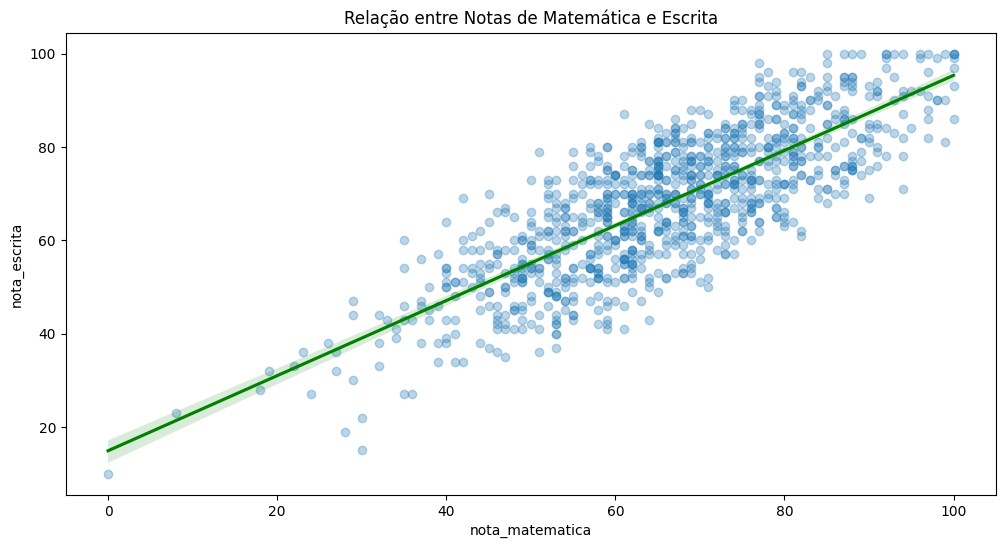

In [294]:
plt.figure(figsize=(12, 6))
sns.regplot(x='nota_matematica', y='nota_escrita', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'green'})
plt.title('Relação entre Notas de Matemática e Escrita')
plt.show()